In [27]:
from PIL import Image, ImageOps, ImageFilter
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

(771, 1080) RGB


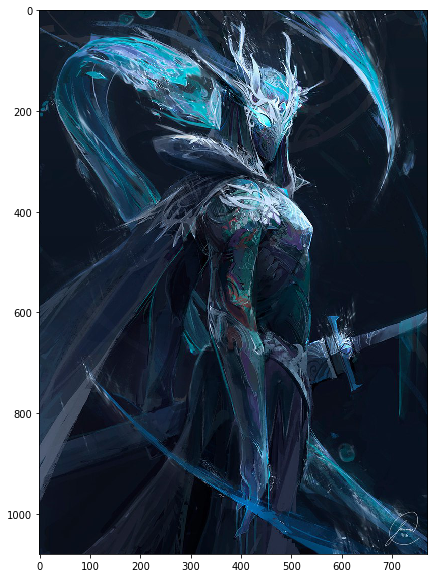

In [28]:
im1 = Image.open("D:/Images/Warriror.jpg")
print(im1.size, im1.mode)
plt.figure(figsize=(im1.size[0]//100, im1.size[1]//100 ))
plt.imshow(im1)

(771, 1080) L


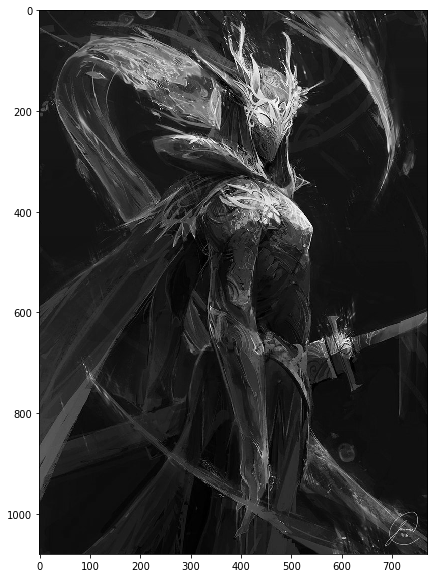

In [29]:
im2 = Image.open("D:/Images/Warriror.jpg")
im2 = ImageOps.grayscale(im2)
print(im2.size, im2.mode)
im2.save("d:/Images/Gray_image.jpg")
plt.figure(figsize=(im2.size[0]//100, im2.size[1]//100))
plt.imshow(im2, cmap='gray')

In [30]:
colors = ['red', "green", 'blue']
def show_hists(name, image, overflow = False):
    len_hist=[i for i in range(256)]
    fig, xy = plt.subplots(1, 3, figsize=(15,5), sharex = True, sharey = True)
    for num, channel in enumerate(image.split()):
        ch_data = np.bincount(np.array(channel.getdata()))
        if(ch_data.shape[0]<256):
            ch_data = np.append(ch_data, [0] * (256 - ch_data.shape[0]))
        if overflow:
            ch_data[255] = 0
        xy[num].set_ylim(top=25000)
        xy[num].bar(len_hist, ch_data, color = colors[num])
        xy[num].title.set_text(name)
    plt.show()
    
def show_hist(name, image, overflow = False):
    len_hist=[i for i in range(256)]
    gr = np.bincount(np.array(image.getdata()))
    if(gr.shape[0]<256):
        gr = np.append(gr, [0] * (256 - gr.shape[0]))
    if overflow:
        gr[255] = 0
    plt.figure(figsize=(8,5))
    plt.bar(len_hist, gr, color = 'gray')
    plt.title(name)
    plt.show()

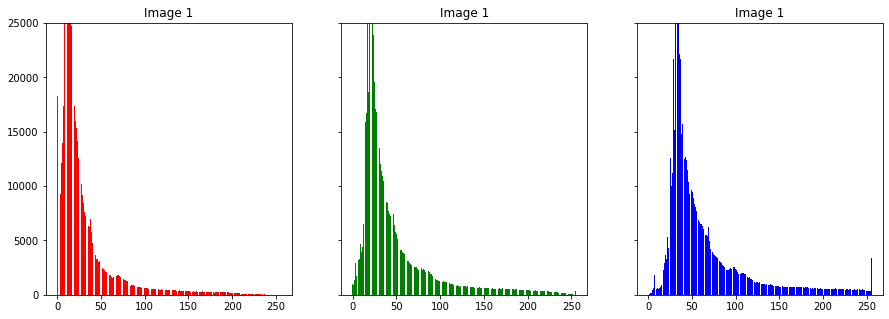

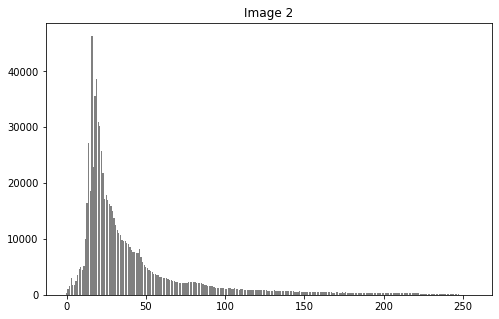

In [31]:
show_hists('Image 1', im1)
show_hist('Image 2', im2)

In [32]:
def use_filter(f_image, kernel, as_Image=False):
    image = np.array(f_image)
    new_image = np.zeros(image.shape)
    
    if len(image.shape)==3:
        for z in range(image.shape[2]):
            for i in range(image.shape[0]-1):
                for j in range(image.shape[1]-1):
                    new_image[i, j, z] = np.sum(kernel * image[i:i+2, j:j+2, z])
    elif len(image.shape)==2:
        for i in range(image.shape[0]-1):
            for j in range(image.shape[1]-1):
                    new_image[i, j] = np.sum(kernel * image[i:i+2, j:j+2])
    return new_image

In [33]:
def use_filter_roberts(f_image):
    kernel1 = [[0, 1],
               [-1, 0]]
    kernel2 = [[1, 0],
               [0, -1]]
    k1_image = use_filter(f_image, kernel1)
    k2_image = use_filter(f_image, kernel2)
    new_image = np.clip(np.sqrt(k1_image ** 2 + k2_image ** 2), 0, 255)
    return Image.fromarray(new_image.astype('uint8'))

Wall time: 6min 3s


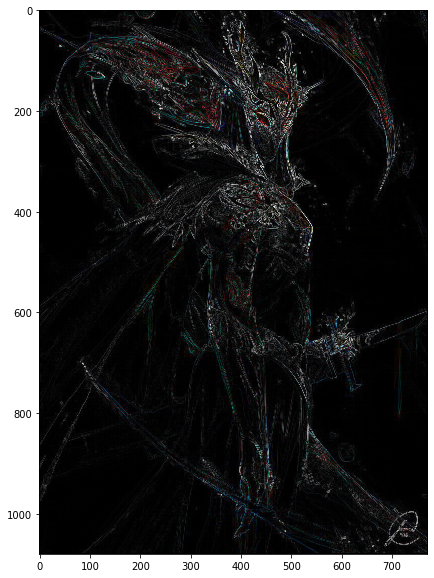

In [34]:
%%time
f_im1 = use_filter_roberts(im1)
f_im1.save("d:/Images/Image_color_F.jpg")
plt.figure(figsize=(im1.size[0]//100, im1.size[1]//100 ))
plt.imshow(f_im1)

Wall time: 1min 52s


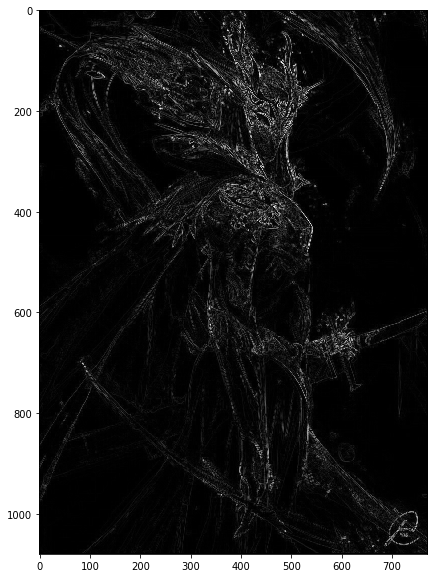

In [35]:
%%time
f_im2 = use_filter_roberts(im2)
f_im2.save("d:/Images/Image_gray_F.jpg")
plt.figure(figsize=(im2.size[0]//100, im2.size[1]//100 ))
plt.imshow(f_im2, cmap='gray')

In [36]:
def use_preparation(image, const):
        return Image.eval(image, lambda px: const*np.log(1+px))

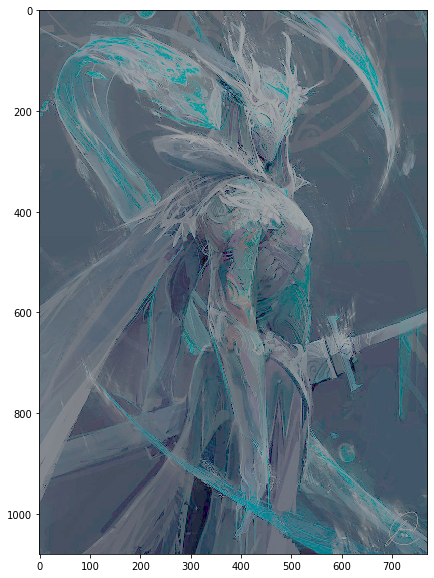

In [42]:
c = 30
c_im1 = use_preparation(im1, c)
c_im1.save("d:/Images/Image_color_C.jpg")
plt.figure(figsize=(im1.size[0]//100, im1.size[1]//100 ))
plt.imshow(c_im1)

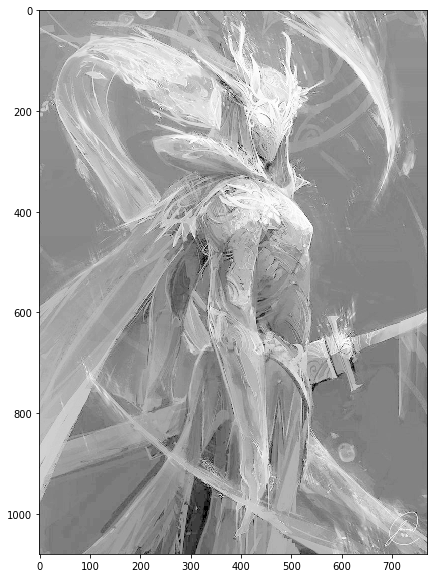

In [41]:
c = 20
c_im2 = use_preparation(im2, c)
c_im2.save("d:/Images/Image_gray_C.jpg")
plt.figure(figsize=(im2.size[0]//100, im2.size[1]//100 ))
plt.imshow(c_im2, cmap='gray')

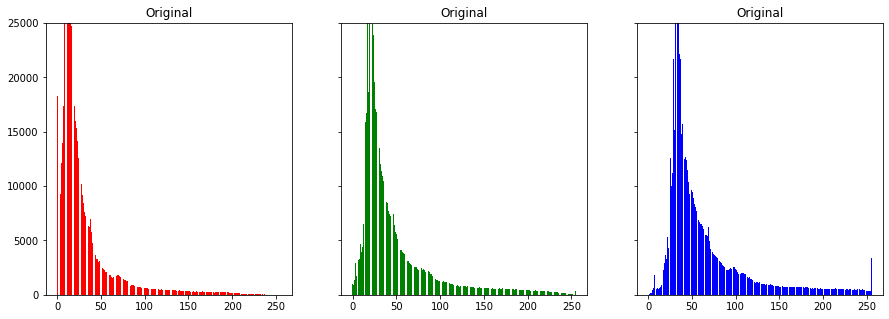

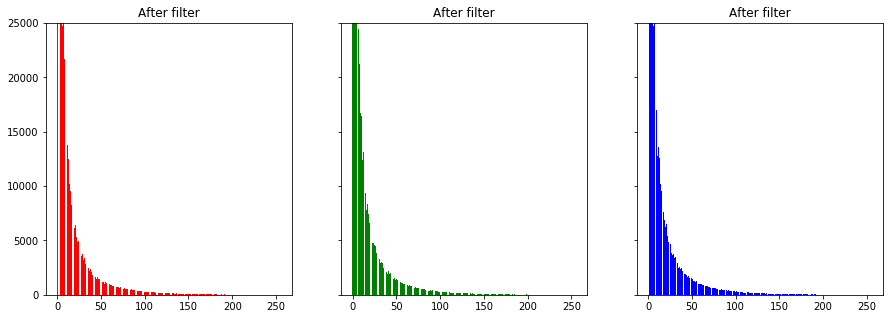

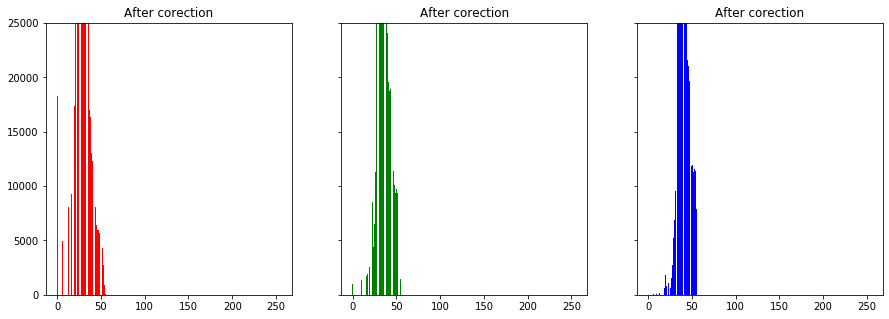

In [39]:
show_hists('Original', im1)
show_hists('After filter', f_im1)
show_hists('After corection', c_im1, overflow = True)

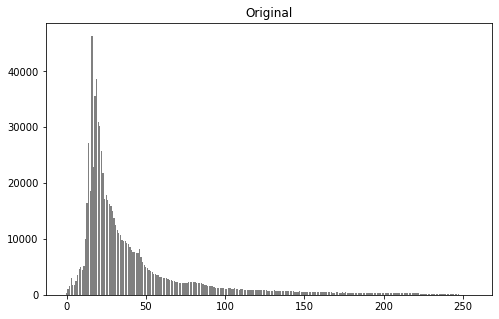

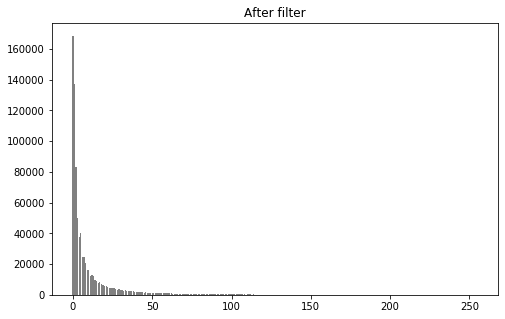

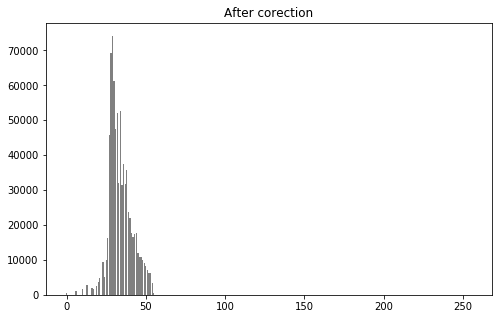

In [40]:
show_hist('Original', im2)
show_hist('After filter', f_im2)
show_hist('After corection', c_im2)